In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import copy

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [3]:
df_grouped = df.sort_values(by='math score',ascending=False)
display(df_grouped.head(15))
print('Number of rows: ',df_grouped.shape[0])
print('Number of columns: ',df_grouped.shape[1])

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
962,female,group E,associate's degree,standard,none,100,100,100
625,male,group D,some college,standard,completed,100,97,99
458,female,group E,bachelor's degree,standard,none,100,100,100
623,male,group A,some college,standard,completed,100,96,86
451,female,group E,some college,standard,none,100,92,97
149,male,group E,associate's degree,free/reduced,completed,100,100,93
916,male,group E,bachelor's degree,standard,completed,100,100,100
263,female,group E,high school,standard,none,99,93,90
306,male,group E,some college,standard,completed,99,87,81
114,female,group E,bachelor's degree,standard,completed,99,100,100


Number of rows:  1000
Number of columns:  8


In [4]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

In [5]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
5,female,group B,associate's degree,standard,none,71,83,78,232
6,female,group B,some college,standard,completed,88,95,92,275
7,male,group B,some college,free/reduced,none,40,43,39,122
8,male,group D,high school,free/reduced,completed,64,64,67,195
9,female,group B,high school,free/reduced,none,38,60,50,148


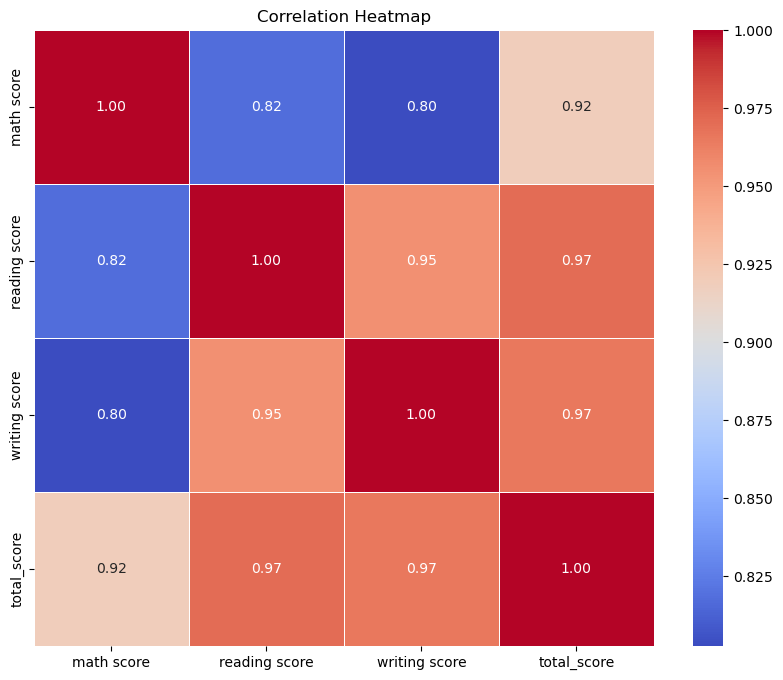

In [6]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [7]:
print(df['race/ethnicity'].nunique())
print(df['race/ethnicity'].value_counts())

5
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


In [8]:
print(df['gender'].nunique())
print(df['gender'].value_counts())

2
gender
female    518
male      482
Name: count, dtype: int64


In [9]:
print(df['parental level of education'].nunique())
print(df['parental level of education'].value_counts())

6
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


In [10]:
print(df['lunch'].nunique())
print(df['lunch'].value_counts())

2
lunch
standard        645
free/reduced    355
Name: count, dtype: int64


In [11]:
print(df['test preparation course'].nunique())
print(df['test preparation course'].value_counts())

2
test preparation course
none         642
completed    358
Name: count, dtype: int64


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
df['gender'] = le.fit_transform(df['gender'])

In [14]:
df['gender']

0      0
1      0
2      0
3      1
4      1
      ..
995    0
996    1
997    0
998    0
999    0
Name: gender, Length: 1000, dtype: int32

In [15]:
le.classes_

array(['female', 'male'], dtype=object)

In [16]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total_score'],
      dtype='object')

In [17]:
df['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])

In [18]:
df['race/ethnicity']

0      1
1      2
2      1
3      0
4      2
      ..
995    4
996    2
997    2
998    3
999    3
Name: race/ethnicity, Length: 1000, dtype: int32

In [19]:
le.classes_

array(['group A', 'group B', 'group C', 'group D', 'group E'],
      dtype=object)

In [20]:
df['parental level of education'] = le.fit_transform(df['parental level of education'])

In [21]:
df['parental level of education']

0      1
1      4
2      3
3      0
4      4
      ..
995    3
996    2
997    2
998    4
999    4
Name: parental level of education, Length: 1000, dtype: int32

In [22]:
le.classes_

array(["associate's degree", "bachelor's degree", 'high school',
       "master's degree", 'some college', 'some high school'],
      dtype=object)

In [23]:
df['lunch'] = le.fit_transform(df['lunch'])

In [24]:
df['lunch']

0      1
1      1
2      1
3      0
4      1
      ..
995    1
996    0
997    0
998    1
999    0
Name: lunch, Length: 1000, dtype: int32

In [25]:
le.classes_

array(['free/reduced', 'standard'], dtype=object)

In [26]:
df['test preparation course'] = le.fit_transform(df['test preparation course'])

In [27]:
df['test preparation course']

0      1
1      0
2      1
3      1
4      1
      ..
995    0
996    1
997    0
998    0
999    1
Name: test preparation course, Length: 1000, dtype: int32

In [28]:
le.classes_

array(['completed', 'none'], dtype=object)

In [29]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,0,1,1,1,1,72,72,74,218
1,0,2,4,1,0,69,90,88,247
2,0,1,3,1,1,90,95,93,278
3,1,0,0,0,1,47,57,44,148
4,1,2,4,1,1,76,78,75,229


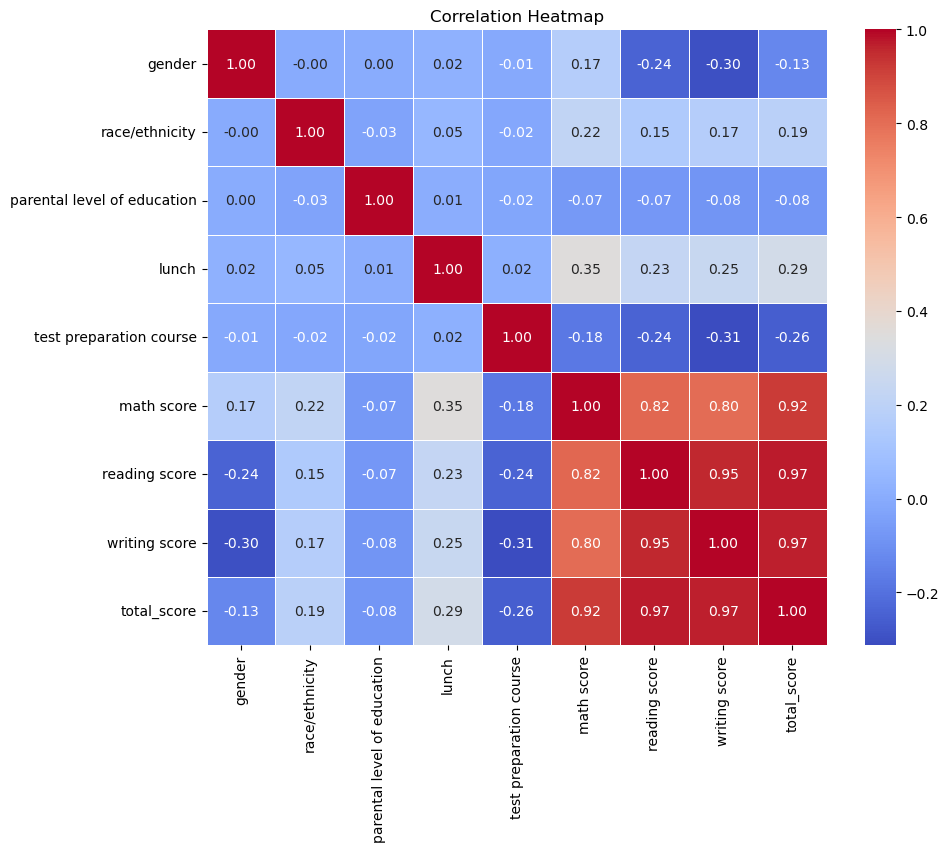

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [31]:
X_train = df.iloc[:,:5]
y_train = df.iloc[:,-1]
display(X_train)
display(y_train)

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,0,1,1,1,1
1,0,2,4,1,0
2,0,1,3,1,1
3,1,0,0,0,1
4,1,2,4,1,1
...,...,...,...,...,...
995,0,4,3,1,0
996,1,2,2,0,1
997,0,2,2,0,0
998,0,3,4,1,0


0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: total_score, Length: 1000, dtype: int64

In [32]:
X_org = copy.deepcopy(X_train)
y_org = copy.deepcopy(y_train)

In [33]:
def zscore_normalize(y):
    """
    returns z-score normalized X by column
    Args:
      X : (numpy array (m,n)) 
    Returns
      X_norm: (numpy array (m,n)) input normalized by column
    """
    mu     = np.mean(y)  
    sigma  = np.std(y)
    y_norm = (y - mu)/sigma      

    return y_norm

In [34]:
y_train = zscore_normalize(y_train)

In [35]:
y_train

0      0.343574
1      1.021927
2      1.747064
3     -1.293830
4      0.600881
         ...   
995    1.840630
996   -0.732434
997   -0.194430
998    0.460532
999    1.068710
Name: total_score, Length: 1000, dtype: float64

In [36]:
X_train = pd.get_dummies(X_train.astype(str), drop_first=True)
display(X_train)

,gender_1,race/ethnicity_1,race/ethnicity_2,race/ethnicity_3,race/ethnicity_4,parental level of education_1,parental level of education_2,parental level of education_3,parental level of education_4,parental level of education_5,lunch_1,test preparation course_1
0,False,True,False,False,False,True,False,False,False,False,True,True
1,False,False,True,False,False,False,False,False,True,False,True,False
2,False,True,False,False,False,False,False,True,False,False,True,True
3,True,False,False,False,False,False,False,False,False,False,False,True
4,True,False,True,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,True,False,False,True,False,False,True,False
996,True,False,True,False,False,False,True,False,False,False,False,True
997,False,False,True,False,False,False,True,False,False,False,False,False
998,False,False,False,True,False,False,False,False,True,False,True,False


In [37]:
def compute_cost(X,y,w,b):
    X=np.array(X)
    y=np.array(y)
    m = X.shape[0]
    cost = 0
    for i in range(m):
        f_wb_i = np.dot(X[i],w) +b
        err = f_wb_i - y[i]
        cost += err**2
    total_cost = cost/(2*m)
    return total_cost

In [38]:
def compute_gradient(X,y,w,b):
    X=np.array(X)
    y=np.array(y)
    m,n = X.shape
    dj_db=0
    dj_dw = np.zeros(n)
    for i in range(m):
        err = np.dot(X[i],w) + b - y[i]
        dj_db+= err
        for j in range(n):
            dj_dw_j = err*X[i,j]
            dj_dw[j]+= dj_dw_j
    dj_db/=m
    dj_dw/=m
    return dj_dw,dj_db

In [39]:
def compute_gradient_matrix(X,y,w,b):
    X=np.array(X)
    y=np.array(y)
    m,n = X.shape
    f_wb = X@w + b
    err = f_wb - y
    dj_db = (1/m) * np.sum(err)
    dj_dw = (1/m) * (X.T@err)
    return dj_dw,dj_db

In [40]:
def gradient_descent(X,y,w_in,b_in,alpha,num_iters):
    X=np.array(X)
    y=np.array(y)
    w = copy.deepcopy(w_in)
    b = b_in
    J_hist = []
    for i in range(num_iters):
        dj_dw,dj_db = compute_gradient(X,y,w,b)
        w = w-alpha*dj_dw
        b = b-alpha*dj_db
        cost = compute_cost(X,y,w,b)
        J_hist.append(cost)
        if i%math.ceil(num_iters/10)==0:
            print(f"w: {w}, b: {b}, cost: {cost}")
    return w,b,J_hist

In [48]:
n= (len(X_train.to_numpy()[0]))
w_in = np.zeros(n)
b_in = 0
w_final, b_final, J_hist = gradient_descent(X_train,y_train,w_in,b_in,0.7,1000)
print(f"final w: {w_final}, final b: {b_final}, final J: {J_hist[-1]}")

w: [-0.04577174 -0.02148733 -0.01001319  0.01813026  0.03425974  0.02407286
 -0.04499836  0.01689133  0.00783478 -0.02341239  0.09715965 -0.08614882], b: -2.347011474057581e-16, cost: 0.46784954416755836
w: [-0.26627808  0.03814235  0.1003109   0.29273069  0.4141253   0.17196376
 -0.36798102  0.28401809 -0.06967871 -0.32752463  0.61444743 -0.53986673], b: 0.01520655770275752, cost: 0.37906026484387106
w: [-0.26305863  0.08465941  0.14535097  0.33782495  0.46251382  0.17383395
 -0.36642928  0.2839551  -0.06836972 -0.32339875  0.61518492 -0.53743294], b: -0.03239778314015876, cost: 0.37888969939024175
w: [-0.26193066  0.09970392  0.16000127  0.35237666  0.47825344  0.17632834
 -0.36433839  0.28574509 -0.06639061 -0.32041302  0.61556951 -0.53651693], b: -0.04937201035001323, cost: 0.37887073130583276
w: [-0.26154293  0.10473002  0.16490028  0.35722625  0.48351759  0.17736509
 -0.36346196  0.2866452  -0.06555359 -0.31923195  0.61571342 -0.53619987], b: -0.055217466236905724, cost: 0.378868

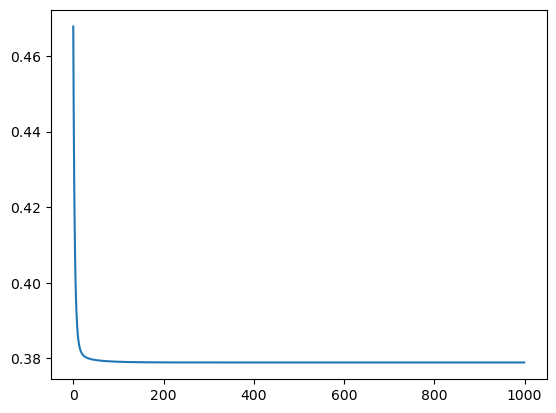

In [49]:
plt.plot(J_hist)

In [50]:
def predict(X,w,b):
    pred = X@w +b
    return pred

In [55]:
pred = predict(X_train,w_final,b_final)
pred

0      0.306748
1      0.659865
2      0.415981
3     -0.855612
4     -0.137514
         ...   
995    1.330927
996   -1.051192
997   -0.253813
998    0.852162
999   -0.299664
Length: 1000, dtype: float64

In [56]:
y_train

0      0.343574
1      1.021927
2      1.747064
3     -1.293830
4      0.600881
         ...   
995    1.840630
996   -0.732434
997   -0.194430
998    0.460532
999    1.068710
Name: total_score, Length: 1000, dtype: float64

In [66]:
y_org

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: total_score, Length: 1000, dtype: int64

In [67]:
mu = np.mean(y_org,axis=0)
sigma = np.std(y_org,axis=0)
y_train_actual = y_train*sigma + mu
pred_actual = pred*sigma + mu

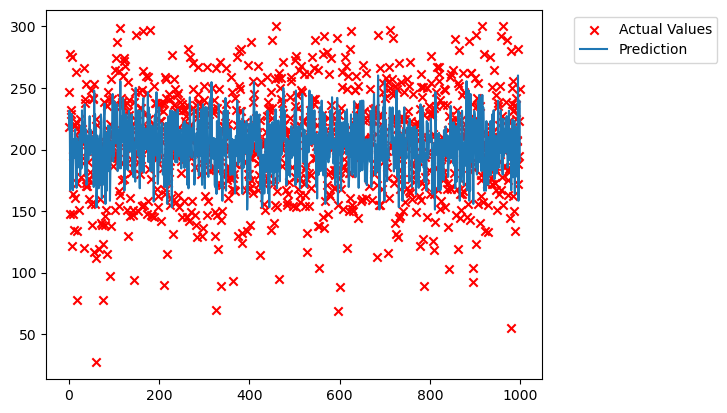

In [78]:
plt.scatter(np.arange(0,1000,1),y_train_actual,marker='x',color='red',label = "Actual Values")
plt.plot(pred_actual,label = "Prediction")
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

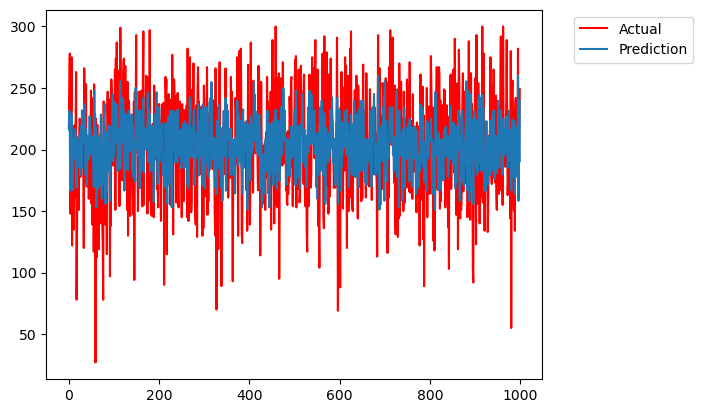

In [80]:
plt.plot(y_train_actual,label = "Actual",color='red')
plt.plot(pred_actual,label = "Prediction")
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_train_actual, pred_actual)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train_actual, pred_actual)
r2 = r2_score(y_train_actual, pred_actual)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)

MSE: 1384.848905090257
RMSE: 37.213558081568294
MAE: 30.03194968733333
R² Score: 0.24226345197170862


In [82]:
# The data is not easy to interpret. Since it contains all categorical features, its R^2 metric is not appealing as well.

In [85]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_org,y_org)
y_pred = model.predict(X_org)
mse = mean_squared_error(y_org, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_org, y_pred)
r2 = r2_score(y_org, y_pred)

print("Linear Regression Results:")
print(f"  MSE: {mse:.4f}")
print(f" RMSE: {rmse:.4f}")
print(f"  MAE: {mae:.4f}")
print(f"   R²: {r2:.4f}")

Linear Regression Results:
  MSE: 1450.5792
 RMSE: 38.0865
  MAE: 30.5124
   R²: 0.2063


In [86]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
model.fit(X_org,y_org)
y_pred = model.predict(X_org)
mse = mean_squared_error(y_org, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_org, y_pred)
r2 = r2_score(y_org, y_pred)

print("Linear Regression Results:")
print(f"  MSE: {mse:.4f}")
print(f" RMSE: {rmse:.4f}")
print(f"  MAE: {mae:.4f}")
print(f"   R²: {r2:.4f}")

Linear Regression Results:
  MSE: 1456.9869
 RMSE: 38.1705
  MAE: 30.5763
   R²: 0.2028
